In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from collections import defaultdict

import seaborn as sns
import scipy

import statsmodels.stats.api as sms

## Metrics


$$
precision = \frac{tp}{tp+fp}
$$

$$
recall = \frac{tp}{tp+fn}
$$

$f1$ score accounts for class imbalance!
$$
f1 = \frac{tp}{tp+0.5\cdot(fn+fp)}=2\cdot\frac{precision \cdot recall}{precision + recall}= \frac{2}{precision^{-1} + recall^{-1}}
$$


$$
accuracy = \frac{tn+tp}{tn+tp+fn+fp}
$$



### Settings

In [ ]:
label = "URSO"

In [ ]:
folder_in = "results_chol\\classification_no_colin"

folder_out = "results_chol\\poster"

### Read the data

In [ ]:
filename='test_sRhD_c3_n09.csv'
df_after_ind = pd.read_csv(f"Out/{filename[:-4]}/metrics_{filename[:-4]}.csv")

### Models after individual feature selection

In [ ]:
ncols = 2
nrows = 3
fig, axes = plt.subplots(ncols = ncols, nrows = nrows, sharey=False)
axes = axes.flatten()         
fig.set_size_inches(10, 10)

metrics = ["precision", "f1", "recall", "accuracy", "auc"]

for ax, metric in zip(axes, metrics):
    #sns.barplot(data=df_after_ind, x='model', y=metric, ax=ax, ci=95) # ci=95 --> 95% confidence interval
    sns.barplot(data=df_after_ind, x='model', y=metric, ax=ax, ci=68) # ci=68 --> standard error!
    
    #ax.set_xlabel("")
    #ax.set_title(metric)
    ax.set_ylabel(metric)
    #if i % ncols:
    #    ax.set_ylabel("")
    #else:
    #    ax.set_ylabel("Frequency")

plt.suptitle(f'Metrics')
fig.subplots_adjust(top=0.95)

#plt.savefig(folder_out+f"\\{label}_metrics_after_ind.pdf", bbox_inches="tight")
plt.savefig(f"Out/{filename[:-4]}/{filename[:-4]}_metrics.png", bbox_inches="tight")

plt.show()

In [7]:
import pandas as pd
df_after_ind= pd.DataFrame()
for i in [1,2,3]:
    for j in [1,2,3]:
        filename=f"test_sRhD_c{i}_n0{3*j}.csv"
        df_after = pd.read_csv(f"Out/{filename[:-4]}/metrics_{filename[:-4]}.csv")
        df_after['filename']=filename
        df_after_ind =pd.concat([df_after_ind,df_after])
df_after_ind[df_after_ind['model']=='ARS']


,auc,precision,recall,f1,accuracy,model,filename
0,0.8829,0.810241,1.0000,0.895175,0.8829,ARS,test_sRhD_c1_n03.csv
0,0.9944,0.989699,0.9992,0.994427,0.9944,ARS,test_sRhD_c1_n06.csv
0,0.8950,0.855472,0.9506,0.900531,0.8950,ARS,test_sRhD_c1_n09.csv
0,0.9959,0.991867,1.0000,0.995917,0.9959,ARS,test_sRhD_c2_n03.csv
0,0.9967,0.994426,0.9990,0.996708,0.9967,ARS,test_sRhD_c2_n06.csv
0,0.9551,0.965052,0.9444,0.954614,0.9551,ARS,test_sRhD_c2_n09.csv
0,0.9996,0.999201,1.0000,0.999600,0.9996,ARS,test_sRhD_c3_n03.csv
0,0.9906,0.982304,0.9992,0.990680,0.9906,ARS,test_sRhD_c3_n06.csv
0,0.7999,0.735363,0.9370,0.824026,0.7999,ARS,test_sRhD_c3_n09.csv


['test_sRhD_c1_n03.csv' 'test_sRhD_c1_n06.csv' 'test_sRhD_c1_n09.csv'
 'test_sRhD_c2_n03.csv' 'test_sRhD_c2_n06.csv' 'test_sRhD_c2_n09.csv'
 'test_sRhD_c3_n03.csv' 'test_sRhD_c3_n06.csv' 'test_sRhD_c3_n09.csv']
['test_sRhD_c1_n03.csv' 'test_sRhD_c1_n06.csv' 'test_sRhD_c1_n09.csv'
 'test_sRhD_c2_n03.csv' 'test_sRhD_c2_n06.csv' 'test_sRhD_c2_n09.csv'
 'test_sRhD_c3_n03.csv' 'test_sRhD_c3_n06.csv' 'test_sRhD_c3_n09.csv']
['test_sRhD_c1_n03.csv' 'test_sRhD_c1_n06.csv' 'test_sRhD_c1_n09.csv'
 'test_sRhD_c2_n03.csv' 'test_sRhD_c2_n06.csv' 'test_sRhD_c2_n09.csv'
 'test_sRhD_c3_n03.csv' 'test_sRhD_c3_n06.csv' 'test_sRhD_c3_n09.csv']
['test_sRhD_c1_n03.csv' 'test_sRhD_c1_n06.csv' 'test_sRhD_c1_n09.csv'
 'test_sRhD_c2_n03.csv' 'test_sRhD_c2_n06.csv' 'test_sRhD_c2_n09.csv'
 'test_sRhD_c3_n03.csv' 'test_sRhD_c3_n06.csv' 'test_sRhD_c3_n09.csv']
['test_sRhD_c1_n03.csv' 'test_sRhD_c1_n06.csv' 'test_sRhD_c1_n09.csv'
 'test_sRhD_c2_n03.csv' 'test_sRhD_c2_n06.csv' 'test_sRhD_c2_n09.csv'
 'test_sRhD_c3_n

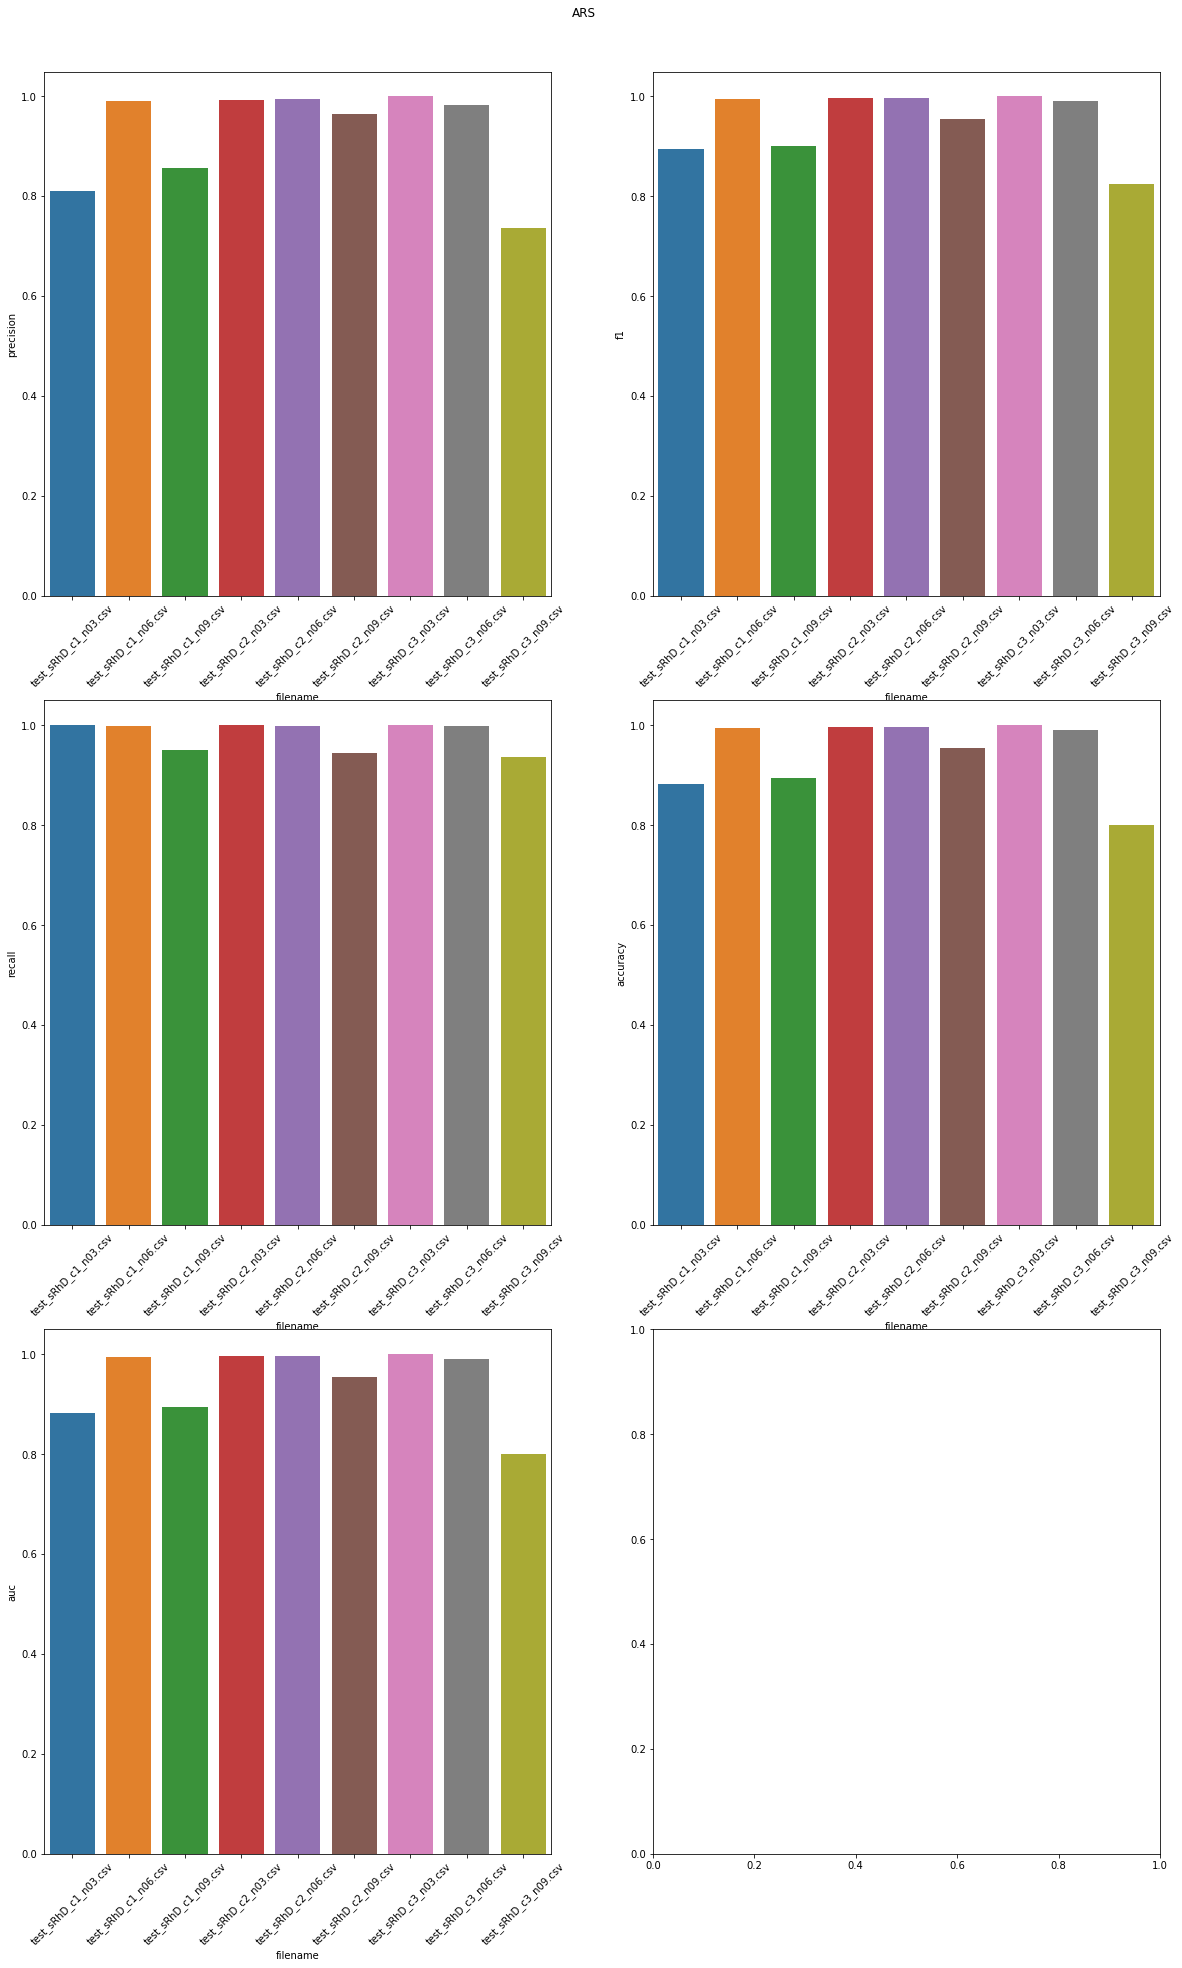

['test_sRhD_c1_n03.csv' 'test_sRhD_c1_n06.csv' 'test_sRhD_c1_n09.csv'
 'test_sRhD_c2_n03.csv' 'test_sRhD_c2_n06.csv' 'test_sRhD_c2_n09.csv'
 'test_sRhD_c3_n03.csv' 'test_sRhD_c3_n06.csv' 'test_sRhD_c3_n09.csv']
['test_sRhD_c1_n03.csv' 'test_sRhD_c1_n06.csv' 'test_sRhD_c1_n09.csv'
 'test_sRhD_c2_n03.csv' 'test_sRhD_c2_n06.csv' 'test_sRhD_c2_n09.csv'
 'test_sRhD_c3_n03.csv' 'test_sRhD_c3_n06.csv' 'test_sRhD_c3_n09.csv']
['test_sRhD_c1_n03.csv' 'test_sRhD_c1_n06.csv' 'test_sRhD_c1_n09.csv'
 'test_sRhD_c2_n03.csv' 'test_sRhD_c2_n06.csv' 'test_sRhD_c2_n09.csv'
 'test_sRhD_c3_n03.csv' 'test_sRhD_c3_n06.csv' 'test_sRhD_c3_n09.csv']
['test_sRhD_c1_n03.csv' 'test_sRhD_c1_n06.csv' 'test_sRhD_c1_n09.csv'
 'test_sRhD_c2_n03.csv' 'test_sRhD_c2_n06.csv' 'test_sRhD_c2_n09.csv'
 'test_sRhD_c3_n03.csv' 'test_sRhD_c3_n06.csv' 'test_sRhD_c3_n09.csv']
['test_sRhD_c1_n03.csv' 'test_sRhD_c1_n06.csv' 'test_sRhD_c1_n09.csv'
 'test_sRhD_c2_n03.csv' 'test_sRhD_c2_n06.csv' 'test_sRhD_c2_n09.csv'
 'test_sRhD_c3_n

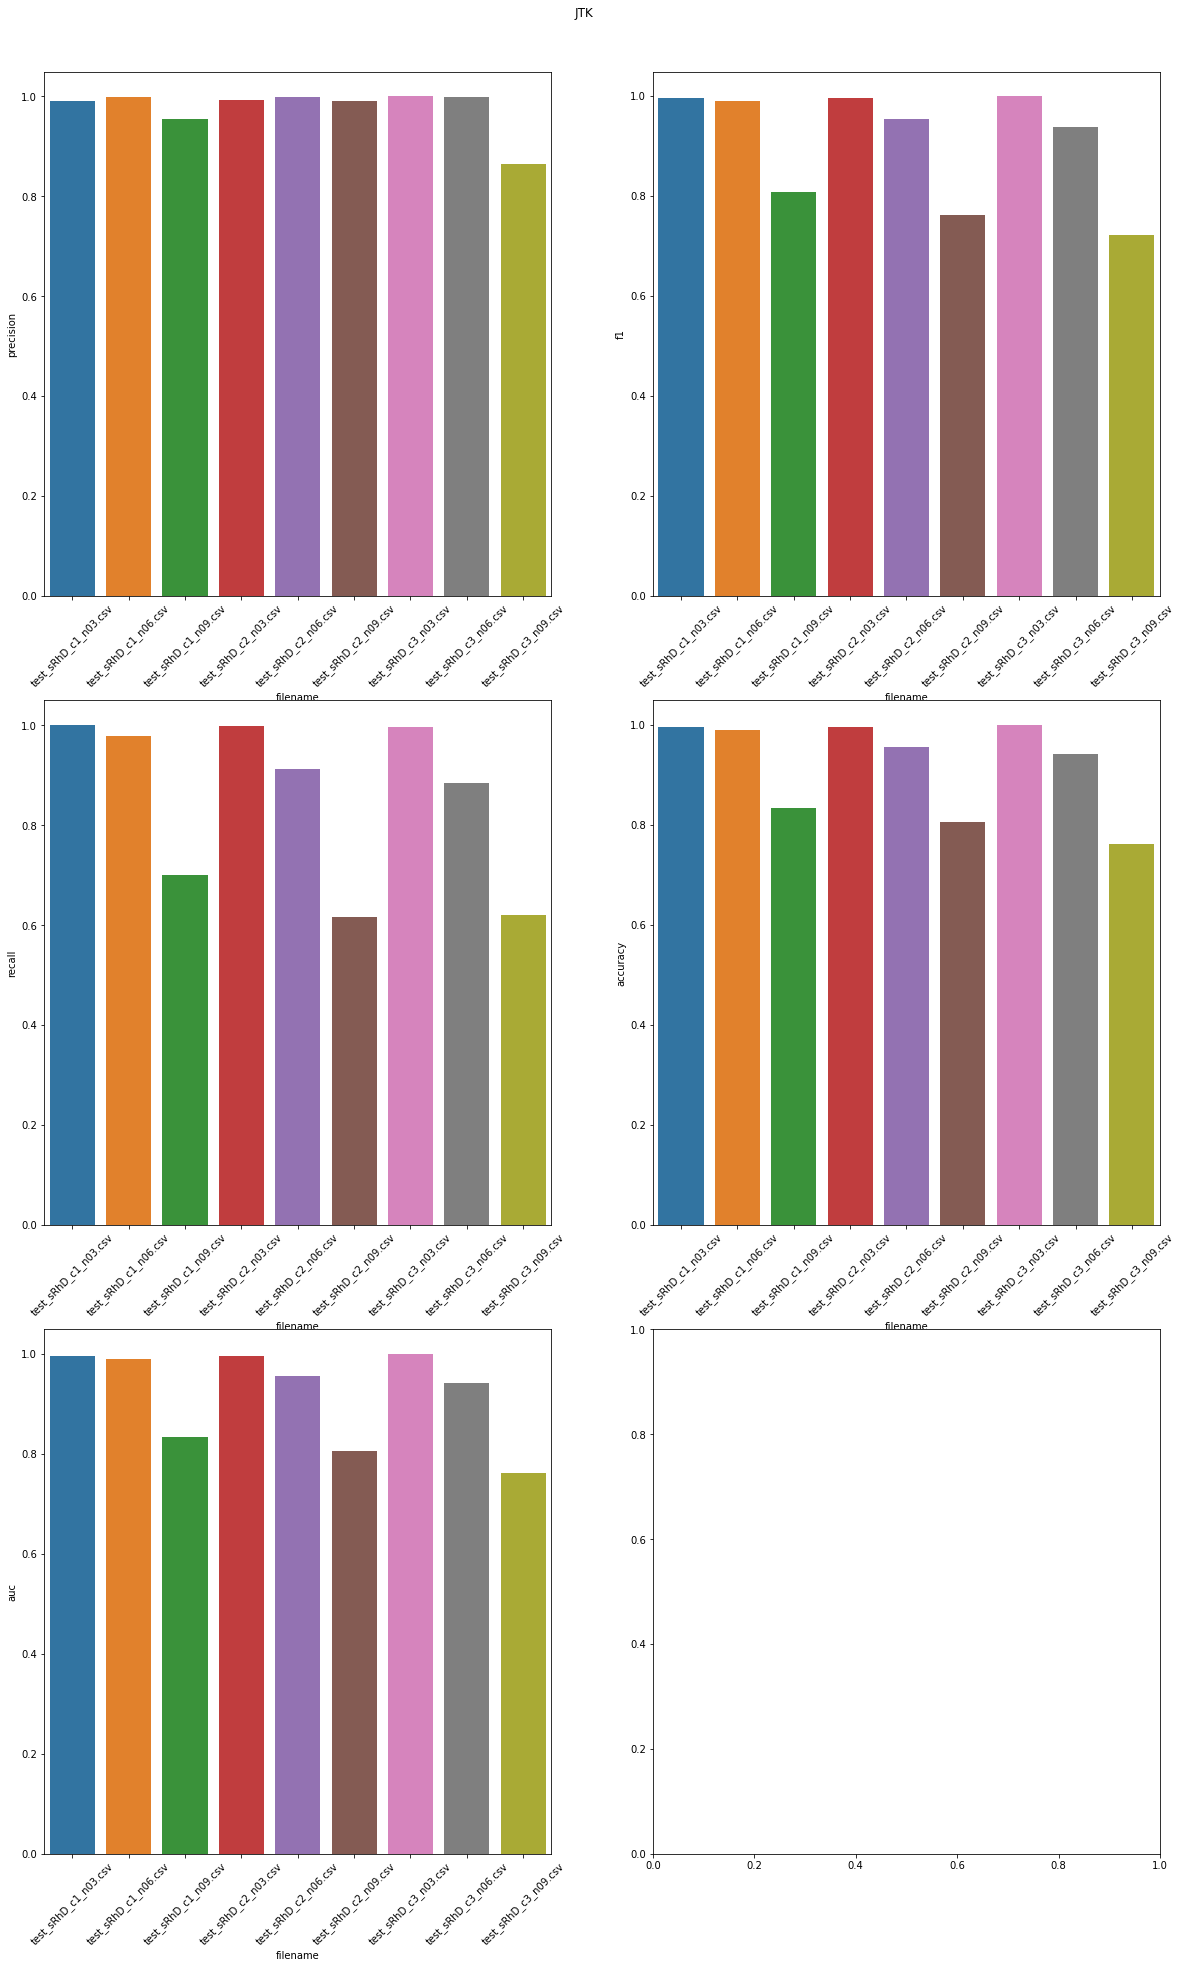

['test_sRhD_c1_n03.csv' 'test_sRhD_c1_n06.csv' 'test_sRhD_c1_n09.csv'
 'test_sRhD_c2_n03.csv' 'test_sRhD_c2_n06.csv' 'test_sRhD_c2_n09.csv'
 'test_sRhD_c3_n03.csv' 'test_sRhD_c3_n06.csv' 'test_sRhD_c3_n09.csv']
['test_sRhD_c1_n03.csv' 'test_sRhD_c1_n06.csv' 'test_sRhD_c1_n09.csv'
 'test_sRhD_c2_n03.csv' 'test_sRhD_c2_n06.csv' 'test_sRhD_c2_n09.csv'
 'test_sRhD_c3_n03.csv' 'test_sRhD_c3_n06.csv' 'test_sRhD_c3_n09.csv']
['test_sRhD_c1_n03.csv' 'test_sRhD_c1_n06.csv' 'test_sRhD_c1_n09.csv'
 'test_sRhD_c2_n03.csv' 'test_sRhD_c2_n06.csv' 'test_sRhD_c2_n09.csv'
 'test_sRhD_c3_n03.csv' 'test_sRhD_c3_n06.csv' 'test_sRhD_c3_n09.csv']
['test_sRhD_c1_n03.csv' 'test_sRhD_c1_n06.csv' 'test_sRhD_c1_n09.csv'
 'test_sRhD_c2_n03.csv' 'test_sRhD_c2_n06.csv' 'test_sRhD_c2_n09.csv'
 'test_sRhD_c3_n03.csv' 'test_sRhD_c3_n06.csv' 'test_sRhD_c3_n09.csv']
['test_sRhD_c1_n03.csv' 'test_sRhD_c1_n06.csv' 'test_sRhD_c1_n09.csv'
 'test_sRhD_c2_n03.csv' 'test_sRhD_c2_n06.csv' 'test_sRhD_c2_n09.csv'
 'test_sRhD_c3_n

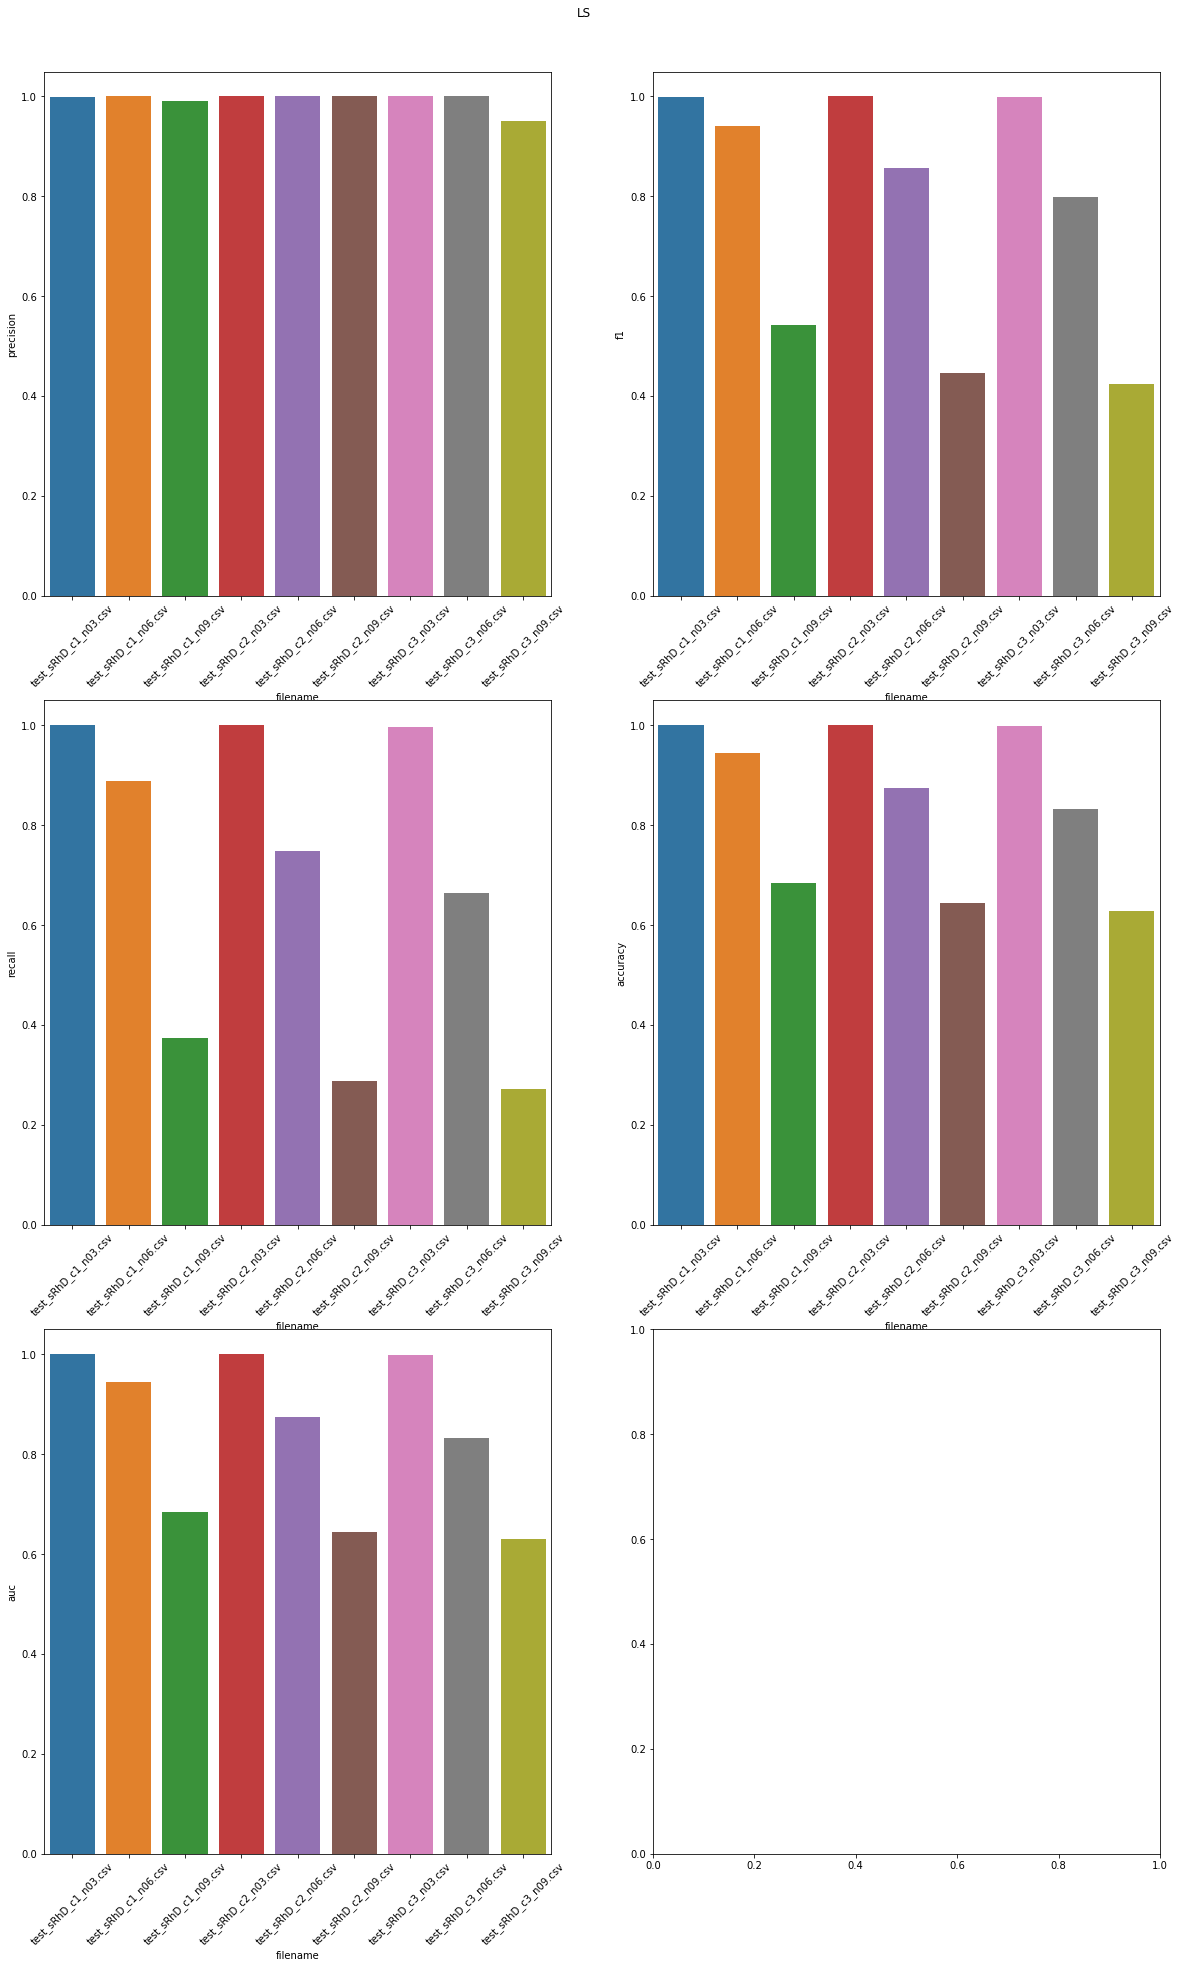

['test_sRhD_c1_n03.csv' 'test_sRhD_c1_n06.csv' 'test_sRhD_c1_n09.csv'
 'test_sRhD_c2_n03.csv' 'test_sRhD_c2_n06.csv' 'test_sRhD_c2_n09.csv'
 'test_sRhD_c3_n03.csv' 'test_sRhD_c3_n06.csv' 'test_sRhD_c3_n09.csv']
['test_sRhD_c1_n03.csv' 'test_sRhD_c1_n06.csv' 'test_sRhD_c1_n09.csv'
 'test_sRhD_c2_n03.csv' 'test_sRhD_c2_n06.csv' 'test_sRhD_c2_n09.csv'
 'test_sRhD_c3_n03.csv' 'test_sRhD_c3_n06.csv' 'test_sRhD_c3_n09.csv']
['test_sRhD_c1_n03.csv' 'test_sRhD_c1_n06.csv' 'test_sRhD_c1_n09.csv'
 'test_sRhD_c2_n03.csv' 'test_sRhD_c2_n06.csv' 'test_sRhD_c2_n09.csv'
 'test_sRhD_c3_n03.csv' 'test_sRhD_c3_n06.csv' 'test_sRhD_c3_n09.csv']
['test_sRhD_c1_n03.csv' 'test_sRhD_c1_n06.csv' 'test_sRhD_c1_n09.csv'
 'test_sRhD_c2_n03.csv' 'test_sRhD_c2_n06.csv' 'test_sRhD_c2_n09.csv'
 'test_sRhD_c3_n03.csv' 'test_sRhD_c3_n06.csv' 'test_sRhD_c3_n09.csv']
['test_sRhD_c1_n03.csv' 'test_sRhD_c1_n06.csv' 'test_sRhD_c1_n09.csv'
 'test_sRhD_c2_n03.csv' 'test_sRhD_c2_n06.csv' 'test_sRhD_c2_n09.csv'
 'test_sRhD_c3_n

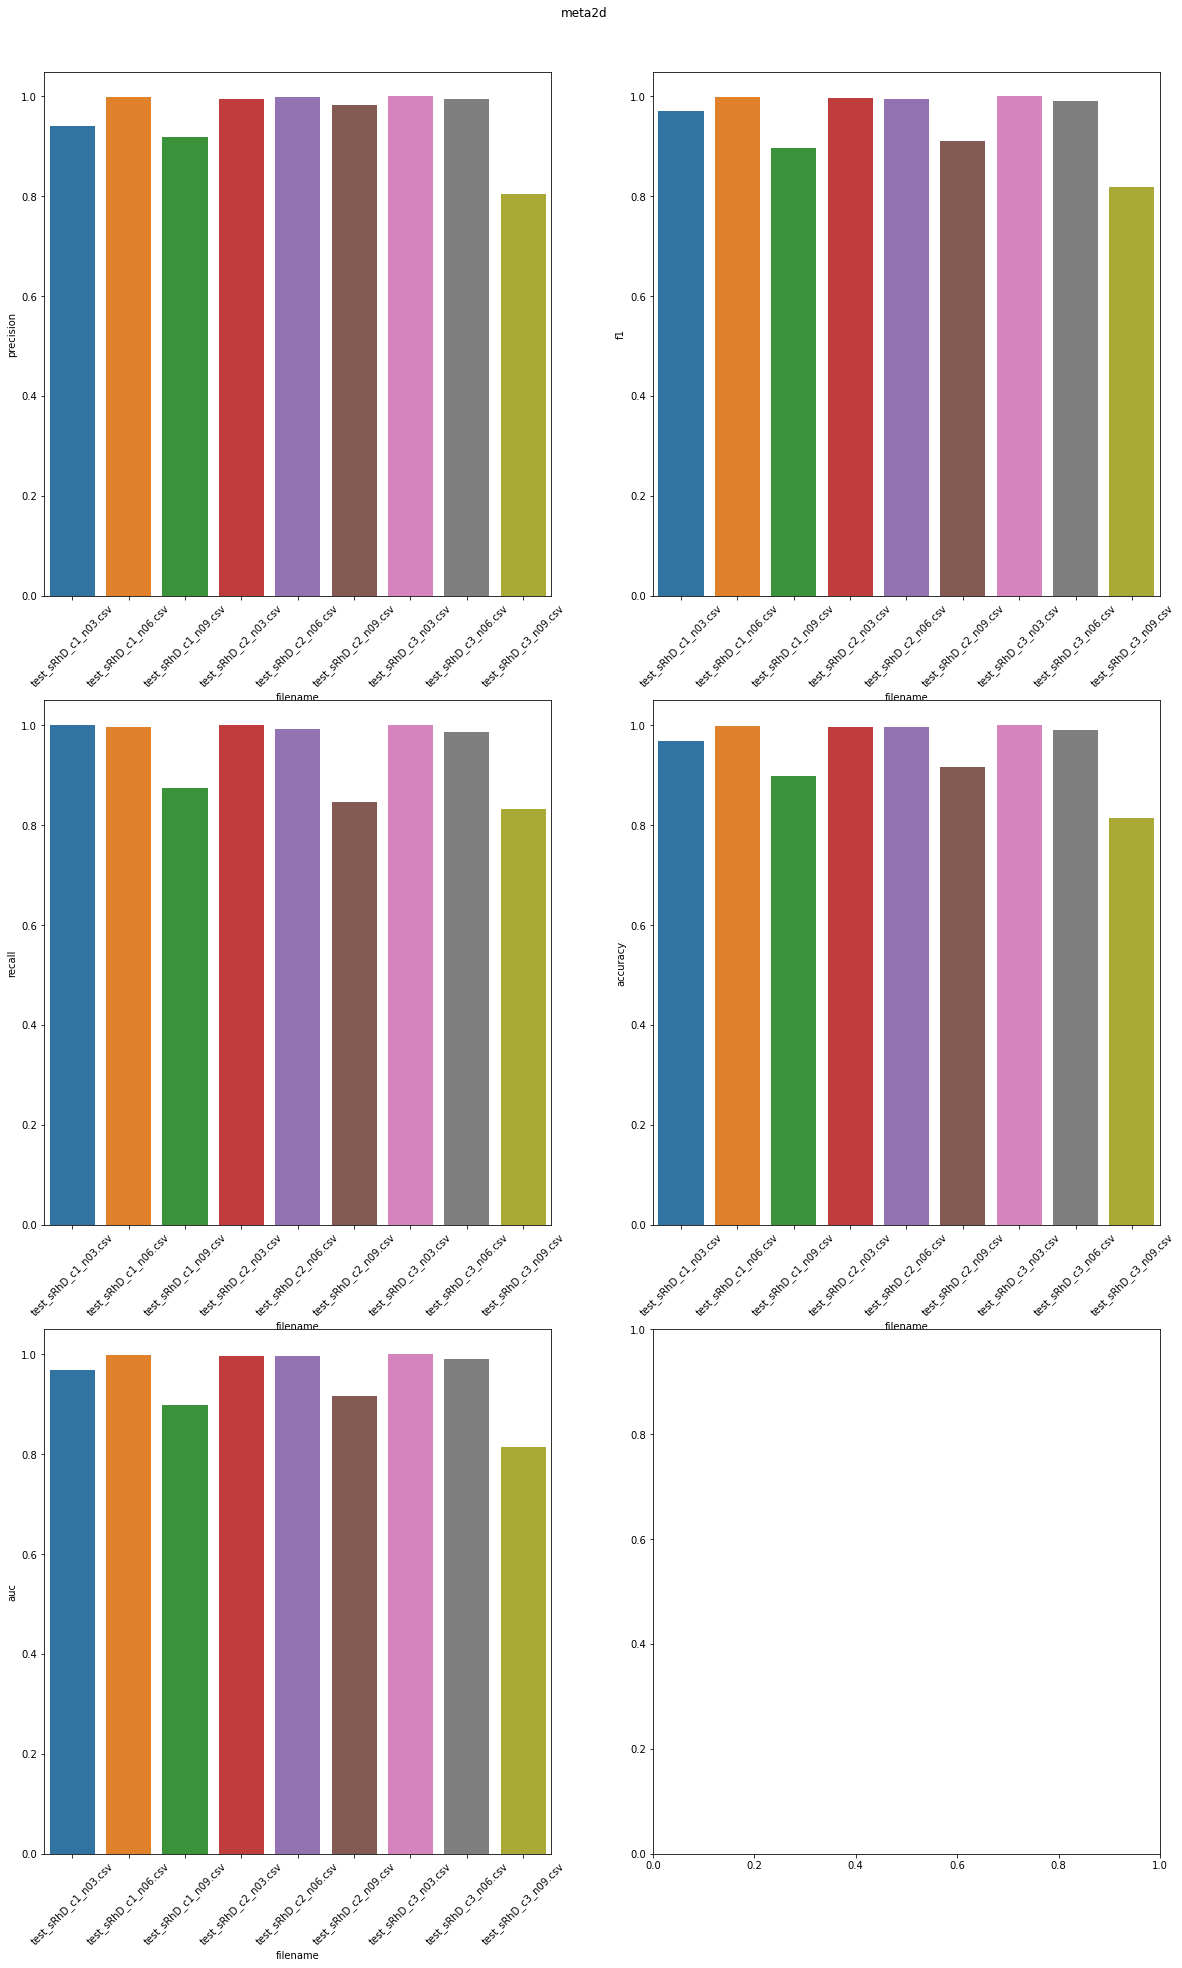

['test_sRhD_c1_n03.csv' 'test_sRhD_c1_n06.csv' 'test_sRhD_c1_n09.csv'
 'test_sRhD_c2_n03.csv' 'test_sRhD_c2_n06.csv' 'test_sRhD_c2_n09.csv'
 'test_sRhD_c3_n03.csv' 'test_sRhD_c3_n06.csv' 'test_sRhD_c3_n09.csv']
['test_sRhD_c1_n03.csv' 'test_sRhD_c1_n06.csv' 'test_sRhD_c1_n09.csv'
 'test_sRhD_c2_n03.csv' 'test_sRhD_c2_n06.csv' 'test_sRhD_c2_n09.csv'
 'test_sRhD_c3_n03.csv' 'test_sRhD_c3_n06.csv' 'test_sRhD_c3_n09.csv']
['test_sRhD_c1_n03.csv' 'test_sRhD_c1_n06.csv' 'test_sRhD_c1_n09.csv'
 'test_sRhD_c2_n03.csv' 'test_sRhD_c2_n06.csv' 'test_sRhD_c2_n09.csv'
 'test_sRhD_c3_n03.csv' 'test_sRhD_c3_n06.csv' 'test_sRhD_c3_n09.csv']
['test_sRhD_c1_n03.csv' 'test_sRhD_c1_n06.csv' 'test_sRhD_c1_n09.csv'
 'test_sRhD_c2_n03.csv' 'test_sRhD_c2_n06.csv' 'test_sRhD_c2_n09.csv'
 'test_sRhD_c3_n03.csv' 'test_sRhD_c3_n06.csv' 'test_sRhD_c3_n09.csv']
['test_sRhD_c1_n03.csv' 'test_sRhD_c1_n06.csv' 'test_sRhD_c1_n09.csv'
 'test_sRhD_c2_n03.csv' 'test_sRhD_c2_n06.csv' 'test_sRhD_c2_n09.csv'
 'test_sRhD_c3_n

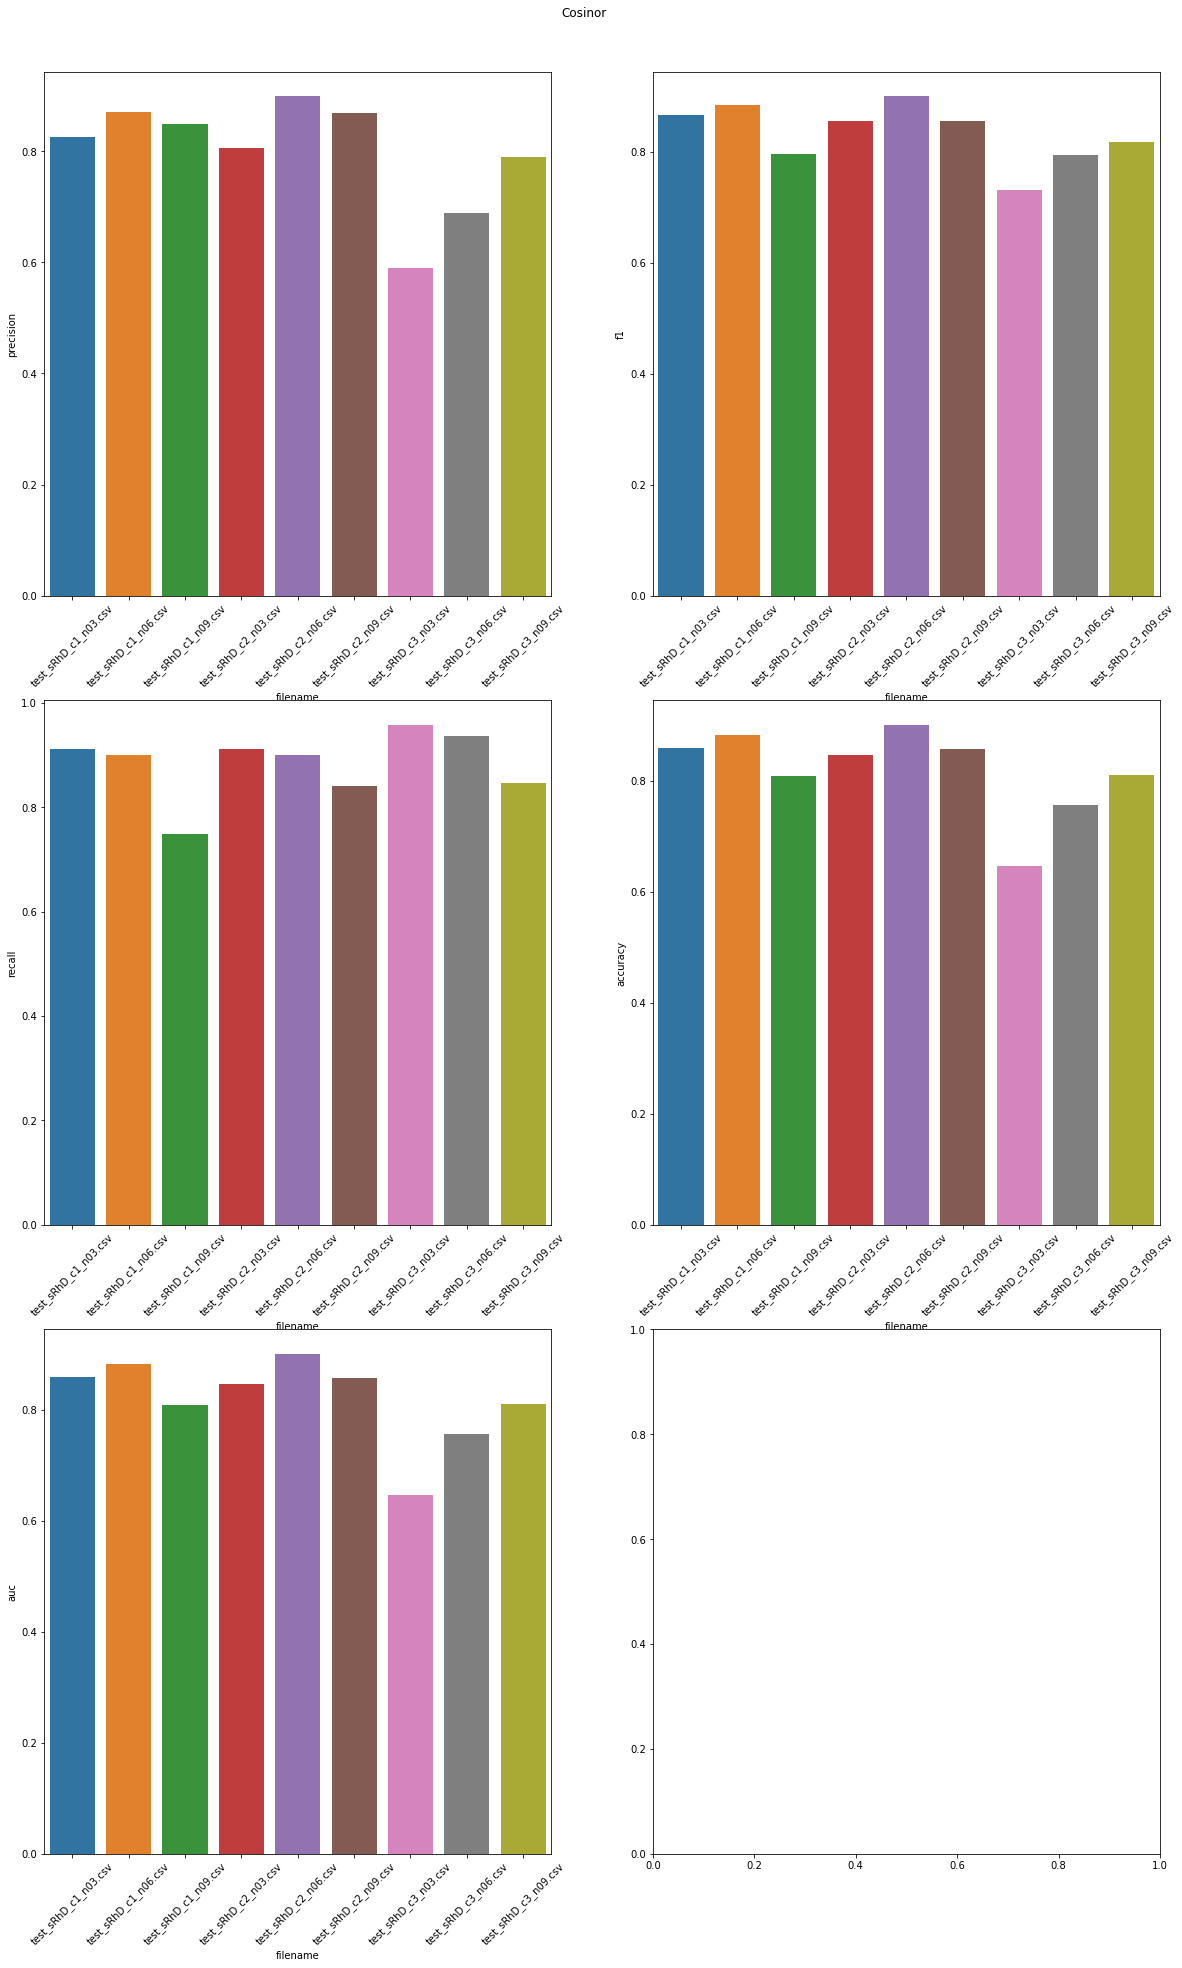

['test_sRhD_c1_n03.csv' 'test_sRhD_c1_n06.csv' 'test_sRhD_c1_n09.csv'
 'test_sRhD_c2_n03.csv' 'test_sRhD_c2_n06.csv' 'test_sRhD_c2_n09.csv'
 'test_sRhD_c3_n03.csv' 'test_sRhD_c3_n06.csv' 'test_sRhD_c3_n09.csv']
['test_sRhD_c1_n03.csv' 'test_sRhD_c1_n06.csv' 'test_sRhD_c1_n09.csv'
 'test_sRhD_c2_n03.csv' 'test_sRhD_c2_n06.csv' 'test_sRhD_c2_n09.csv'
 'test_sRhD_c3_n03.csv' 'test_sRhD_c3_n06.csv' 'test_sRhD_c3_n09.csv']
['test_sRhD_c1_n03.csv' 'test_sRhD_c1_n06.csv' 'test_sRhD_c1_n09.csv'
 'test_sRhD_c2_n03.csv' 'test_sRhD_c2_n06.csv' 'test_sRhD_c2_n09.csv'
 'test_sRhD_c3_n03.csv' 'test_sRhD_c3_n06.csv' 'test_sRhD_c3_n09.csv']
['test_sRhD_c1_n03.csv' 'test_sRhD_c1_n06.csv' 'test_sRhD_c1_n09.csv'
 'test_sRhD_c2_n03.csv' 'test_sRhD_c2_n06.csv' 'test_sRhD_c2_n09.csv'
 'test_sRhD_c3_n03.csv' 'test_sRhD_c3_n06.csv' 'test_sRhD_c3_n09.csv']
['test_sRhD_c1_n03.csv' 'test_sRhD_c1_n06.csv' 'test_sRhD_c1_n09.csv'
 'test_sRhD_c2_n03.csv' 'test_sRhD_c2_n06.csv' 'test_sRhD_c2_n09.csv'
 'test_sRhD_c3_n

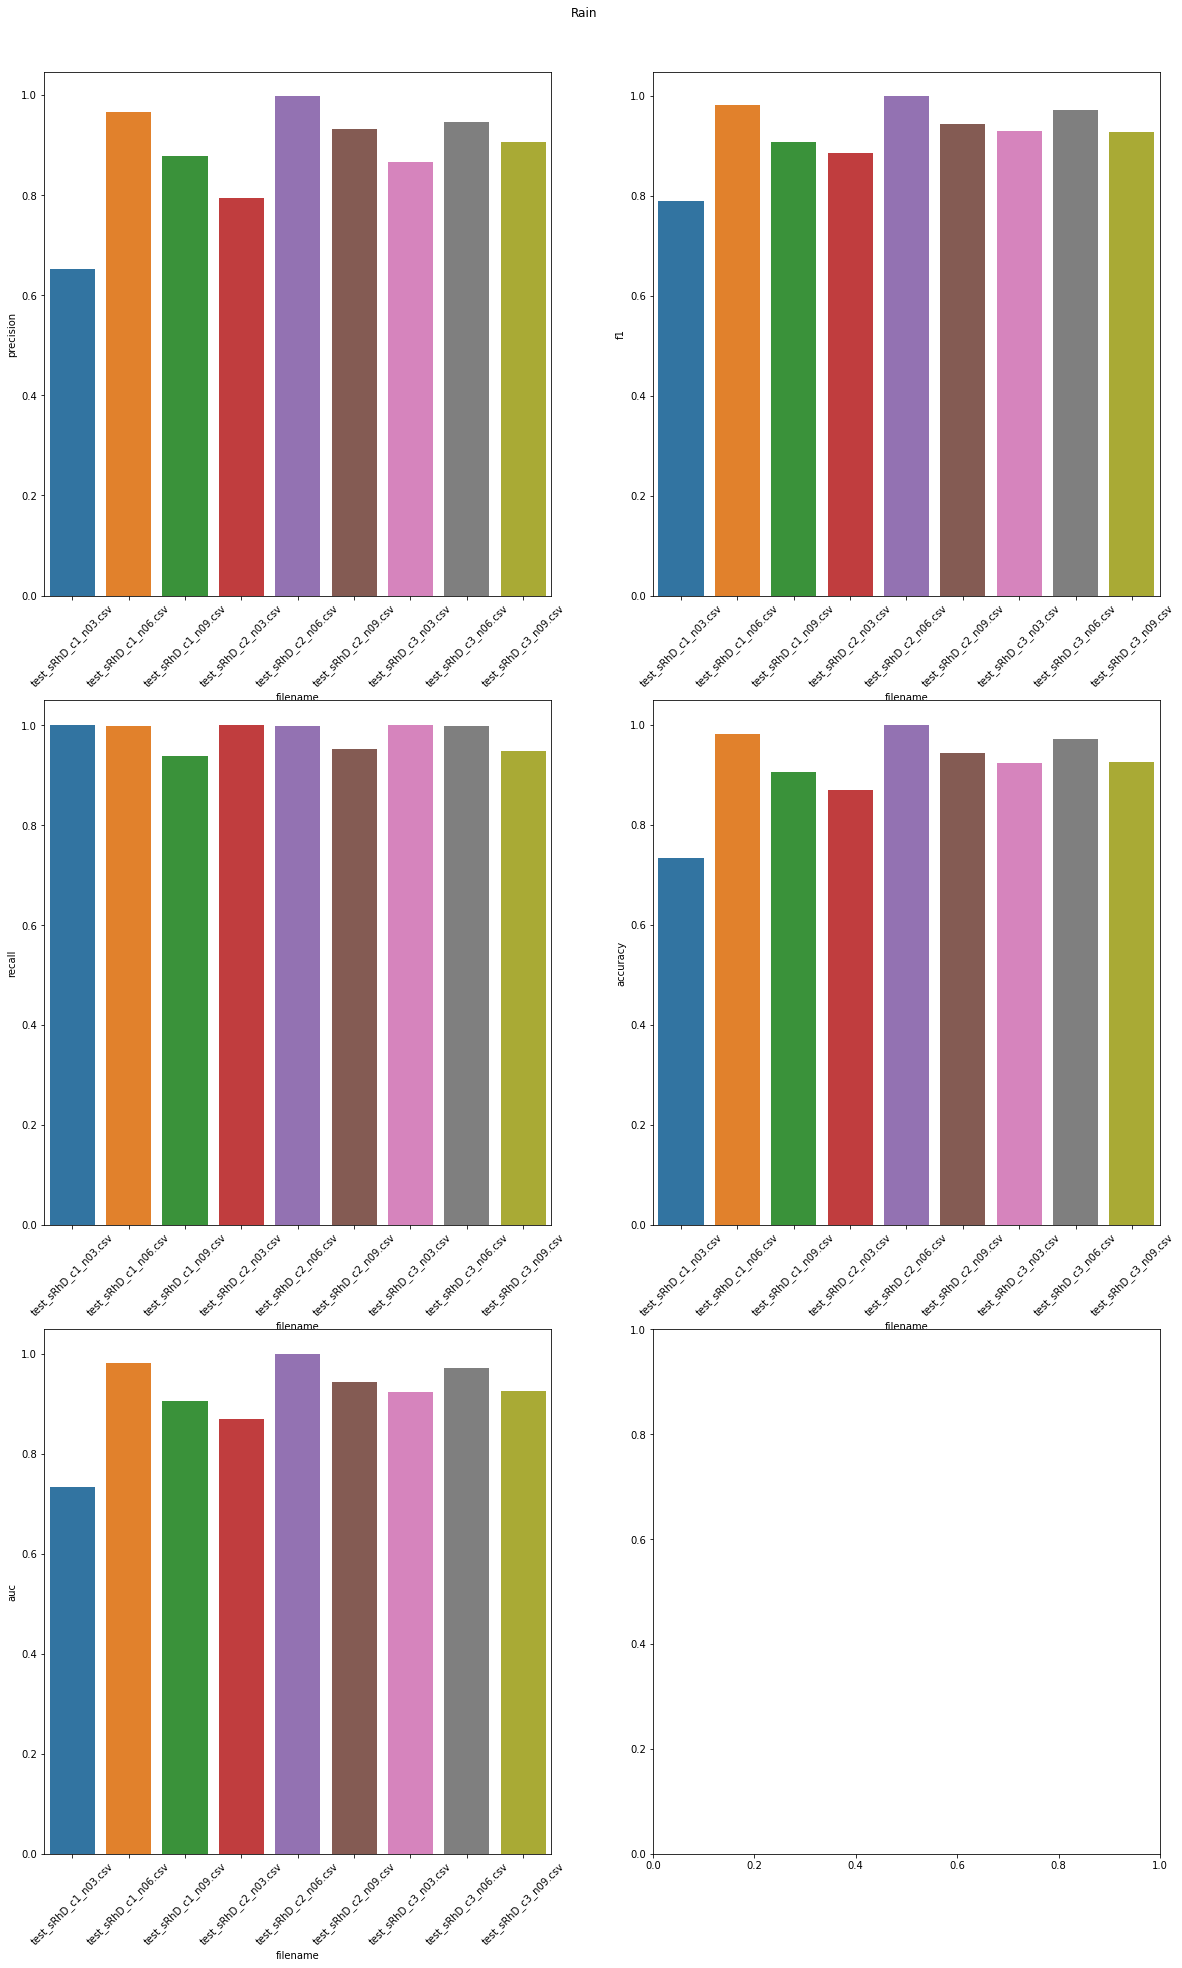

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
ncols = 2
nrows = 3
models = ['ARS','JTK','LS','meta2d','Cosinor','Rain']
metrics = ["precision", "f1", "recall", "accuracy", "auc"]
for model in models:
    fig, axes = plt.subplots(ncols = ncols, nrows = nrows, sharey=False)
    axes = axes.flatten()         
    fig.set_size_inches(20, 30)
    for ax, metric in zip(axes, metrics):
        #sns.barplot(data=df_after_ind, x='model', y=metric, ax=ax, ci=95) # ci=95 --> 95% confidence interval
        df=df_after_ind[df_after_ind['model']==model]
        print(df['filename'].to_numpy())
        sns.barplot(data=df, x='filename', y=metric, ax=ax, ci=68) # ci=68 --> standard error!
        ax.set_xticklabels(df['filename'].to_numpy(), rotation=45)
        #ax.set_xlabel("")
        #ax.set_title(metric)
        ax.set_ylabel(metric)
        #if i % ncols:
        #    ax.set_ylabel("")
        #else:
        #    ax.set_ylabel("Frequency")
    

    plt.suptitle(model)
    fig.subplots_adjust(top=0.95)

    #plt.savefig(folder_out+f"\\{label}_metrics_after_ind.pdf", bbox_inches="tight")
    plt.savefig(f"Out/{model}_metrics.png", bbox_inches="tight",facecolor='white')

    plt.show()

### Metrics only for a selected model

In [ ]:
model_type = "svc"
metrics = ["precision", "f1", "recall", "accuracy", "auc"]

In [ ]:
df_selected = pd.DataFrame(columns=["metric", "value"])
vals = {}

for _,model in df_after_ind[df_after_ind['model']==model_type].iterrows():
    for metric in metrics:
        #print(model[metric])
        d = {'metric': metric, 'value': model[metric]}
        df_selected = df_selected.append(d, ignore_index=True)
        
        if metric not in vals:
            vals[metric] = []
        vals[metric].append(model[metric])

In [ ]:
means = [np.mean(vals[m]) for m in vals]

In [ ]:
def ci(data):
    #return scipy.stats.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=scipy.stats.sem(data))  
    #ci_l, ci_u = scipy.stats.bootstrap((np.array(data),), np.std,  confidence_level=0.95)#.confidence_interval
    #return ci_l, ci_u
    
    my_samples = []
    for _ in range(100):
        x = np.random.choice(data, size=len(data), replace=True)
        my_samples.append(x.mean())
        
    return scipy.stats.t.interval(alpha=0.95, df=len(my_samples)-1, loc=np.mean(my_samples), scale=scipy.stats.sem(my_samples))  
    #return np.percentile(my_samples, 2.5), np.percentile(my_samples, 97.5)
    #return sms.DescrStatsW(my_samples).tconfint_mean()

def radar(vals, SE = True):
    
    categories = list(vals.keys())
    N = len(vals)
    means = [np.mean(vals[m]) for m in vals]
    means.append(means[0])    
    means = np.array(means)
    
    
    if SE:
        sems = [np.std(vals[m])/np.sqrt(len(vals[m])) for m in vals]
        
        print("sems:", sems)
        
        sems.append(sems[0])
        sems = np.array(sems)
        lower = means-sems
        upper = means+sems       
    
    else:
        #create 95% confidence interval for population mean weight
        CIs = [ci(v) for _,v in vals.items()]
        
        print("CIs:", CIs)
        
        CIs.append(CIs[0])
        lower, upper = list(zip(*CIs))

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]
    angles = [a + np.pi/2 for a in angles]
    angles = [a - 2*np.pi if a > 2*np.pi else a for a in angles]
        

    # Initialise the spider plot
    ax = plt.subplot(111, polar=True)

    # Draw one axe per variable + add labels
    plt.xticks(angles[:-1], categories, color='grey', size=12)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([0.5,0.75,1], ["0.5","0.75","1"], color="grey", size=10)
    plt.ylim(0.5,1)

    # Plot data
    ax.plot(angles, means, linewidth=1, linestyle='solid')
    

    # Fill area
    ax.fill_between(angles, lower, upper, alpha=0.1)

    f = plt.gcf()
    f.set_size_inches(10, 10)
    
    # Show the graph
    
    #plt.savefig(folder_out+f"\\{model_type}_radar.pdf", bbox_inches="tight")
    #plt.savefig(folder_out+f"\\{model_type}_radar.png", bbox_inches="tight")

    
    plt.show()

In [ ]:
#radar(vals, SE=False)

In [ ]:
radar(vals, SE=True)

In [ ]:
fig=plt.gcf()

fig.set_size_inches(10, 10)


#x=sns.barplot(data=df_selected, x='metric', y='value', ci=95)
x=sns.barplot(data=df_selected, x='metric', y='value', ci=68) # ci=68 --> standard error!
    

plt.xlabel("")
plt.ylabel("")
plt.title("SVC")

plt.savefig(folder_out+f"\\{model_type}_metrics_after_ind.pdf", bbox_inches="tight")
plt.savefig(folder_out+f"\\{model_type}_metrics_after_ind.png", bbox_inches="tight")

plt.show()